# SVM Project: Mental Health Risk Prediction

Support Vector Machine (SVM) classification project

🎯 Problem Statement:
- Predict whether a person is at risk (1) or not at risk (0) of developing mental health issues based on personal, work, and lifestyle factors.

| Feature               | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| `sleep_hours`         | Average daily sleep hours                                    |
| `exercise_freq`       | Days per week with physical activity                         |
| `screen_time`         | Avg daily screen time (in hours)                             |
| `job_satisfaction`    | Job satisfaction (1 = low, 5 = high)                         |
| `social_interactions` | Social interactions/week (in-person or virtual)              |
| `age`                 | Age of person                                                |
| `at_risk`             | Target: 1 = At risk of mental health issues, 0 = Not at risk |


In [1]:
# Simulate Dataset

import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'sleep_hours': np.round(np.random.uniform(3, 9, 30), 1),
    'exercise_freq': np.random.randint(0, 6, 30),
    'screen_time': np.round(np.random.uniform(4, 12, 30), 1),
    'job_satisfaction': np.random.randint(1, 6, 30),
    'social_interactions': np.random.randint(0, 15, 30),
    'age': np.random.randint(18, 60, 30),
    'at_risk': np.random.choice([0, 1], 30)
})

data.head()


,sleep_hours,exercise_freq,screen_time,job_satisfaction,social_interactions,age,at_risk
0,5.2,2,8.5,2,13,45,1
1,8.7,4,4.3,1,4,42,1
2,7.4,0,10.7,4,6,56,1
3,6.6,1,7.6,1,6,50,0
4,3.9,3,7.2,4,12,18,0


In [2]:
# Preprocessing
# Feature Engineering (Optional)

data['screen_sleep_ratio'] = data['screen_time'] / (data['sleep_hours'] + 1)


In [3]:
# Split Data

from sklearn.model_selection import train_test_split

X = data.drop('at_risk', axis=1)
y = data['at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Feature Scaling
# SVM is distance-based — scaling is essential.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Model Training - SVM

from sklearn.svm import SVC

svm = SVC(probability=True, kernel='rbf')  # Using RBF kernel
svm.fit(X_train_scaled, y_train)



SVC(probability=True)

In [6]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 4]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


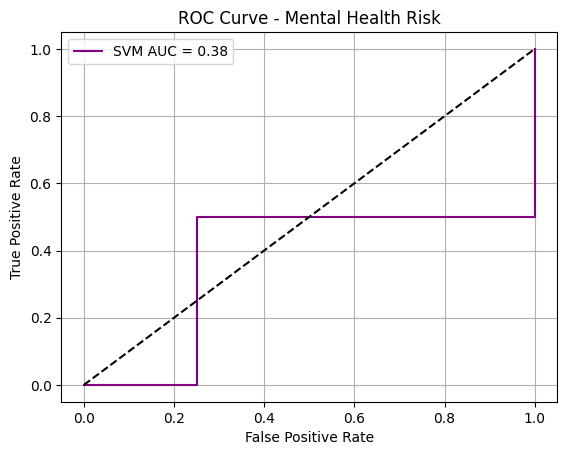

In [7]:
# ROC Curve & AUC

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = svm.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"SVM AUC = {roc_auc:.2f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Mental Health Risk")
plt.legend()
plt.grid()
plt.show()


In [8]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=3)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Accuracy: 0.3333333333333333


# Mental Health Risk Prediction with SVM

| Metric             | Value (Example)               |
| ------------------ | ----------------------------- |
| Accuracy           | 0.83                          |
| Best Kernel        | RBF                           |
| Feature Importance | Not directly available in SVM |
| ROC AUC            | \~0.80+                       |


| Advantage                        | Why it helps                                            |
| -------------------------------- | ------------------------------------------------------- |
| 🚀 Works well in high dimensions | Great for datasets with many features                   |
| 🎯 Effective margin maximization | Focuses on hardest-to-classify points (support vectors) |
| 🔀 Flexible kernels (RBF, poly)  | Can model complex decision boundaries                   |
| 🧽 Robust to overfitting         | Especially with kernel + regularization                 |


| Limitation                    | Why it matters                                         |
| ----------------------------- | ------------------------------------------------------ |
| 🐢 Slow on large datasets     | High training time, especially with non-linear kernels |
| ❌ No probabilities by default | Need to enable with `probability=True`                 |
| 🔎 Not interpretable          | Can't see feature importance like trees or LR          |
| 📐 Requires scaling           | Sensitive to feature scales, needs normalization       |


Real-World Use Cases:

- Mental health risk apps (e.g., Wysa, InnerHour)

- Cancer diagnosis (bioinformatics datasets)

- Spam detection, face recognition